<img src="images/Labs/IV/AE.png" alt="scheme" height=50% width=60%>

https://debuggercafe.com/implementing-deep-autoencoder-in-pytorch/

In [ ]:
class AutoEncoder(nn.Module):
    
    def __init__(self, img_shape, inp_dim, hidden_dim):
        super(AutoEncoder, self).__init__()
        self.img_shape = img_shape
        self.encoder = nn.Sequential(nn.Linear(inp_dim, 256),
                                     nn.ReLU(),
                                     nn.Linear(256, 128),
                                     nn.ReLU(),
                                     nn.Linear(128, hidden_dim)
                                    )
        self.decoder = nn.Sequential(nn.Linear(hidden_dim, 128),
                                     nn.ReLU(),
                                     nn.Linear(128, 256),
                                     nn.ReLU(),
                                     nn.Linear(256, inp_dim)
                                    )
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        return x.view(*self.img_shape)
    
    def encode(self, x):
        x = x.view(x.size(0), -1)
        return self.encoder(x)
    
    def decode(self. x_latent):
        return self.decoder(x).view(*self.img_shape)

### Train

<img src="images/Labs/IV/6.png" alt="scheme" height=50% width=60%>

In [3]:
# constants
NUM_EPOCHS = 100
LEARNING_RATE = 1e-3
BATCH_SIZE = 128
# image transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

criterion = nn.MSELoss() # nn.BCELoss() 
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

In [4]:
# Dataset
trainset = datasets.FashionMNIST(
    root='./data',
    train=True, 
    download=False,
    transform=transform
)
testset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=False,
    transform=transform
)
# Dataloader
trainloader = DataLoader(
    trainset, 
    batch_size=BATCH_SIZE,
    shuffle=True
)
testloader = DataLoader(
    testset, 
    batch_size=BATCH_SIZE, 
    shuffle=True
)

In [10]:
img.shape

torch.Size([1, 28, 28])

In [177]:
labeldict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

KERAS
https://www.kaggle.com/code/nathra/fashion-mnist-convolutional-autoencoder

In [ ]:
lat = model.encode(img[None,:,:,:])
res = model(img[None,:,:,:])

In [12]:
print(lat.shape)
print(res.shape)

torch.Size([1, 10])
torch.Size([1, 1, 28, 28])


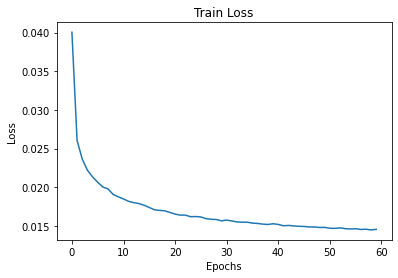

In [15]:
plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('deep_ae_fashionmnist_loss.png')

#### save model!

In [16]:
PATH = f'fashion_AE_{latent_space_dim}.pth'
torch.save(model.state_dict(), PATH)

In [137]:
def display(img, img_size=28):
    """ Show image. """
    plt.imshow(img.numpy().reshape((img_size, img_size)), cmap='gray')
    plt.show()

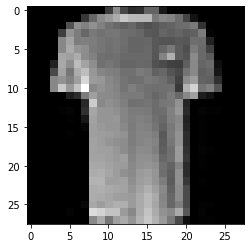

In [142]:
display(top[4])

In [181]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
from sklearn.decomposition import PCA

In [182]:
def plot_latent(x_test, count=1000):
    inputs, labels = next(iter(x_test))
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title('autoencoder')
    encoded = model.encoder(inputs.to(device))
    coords = encoded.detach().cpu().numpy()
    #coords = PCA(n_components=2).fit_transform(encoded.reshape(count, -1))

    classes = labels.cpu().numpy() #[labeldict.get(label) for label in labels]
    plt.scatter(coords[:, 0], coords[:, 1], c=classes)
    plt.colorbar()
    for i in range(10):
        class_center = np.mean(coords[classes == i], axis=0)
        text = TextArea('{} ({})'.format(labeldict[i], i))
        ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
        ax.add_artist(ab)
    plt.show()

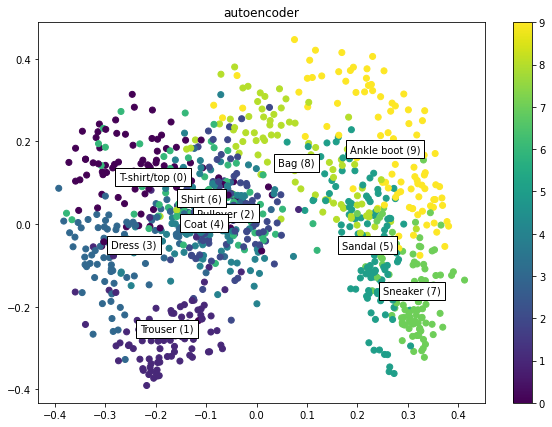

In [183]:
plot_latent(testloader)

### Test

In [ ]:
# load model
PATH = 'fashion_AE_4.pth'
model = AutoEncoder()
model.load_state_dict(torch.load(PATH))
model.eval()

In [4]:
from ipywidgets import interactive

def plot(z1, z2, z3, z4):
    plt.figure(2)
    z = torch.Tensor([[z1, z2, z3, z4]]).to(device)
    decoded = decoder(z)
    img = decoded.reshape(28, 28).to('cpu').detach().numpy()
    plt.imshow(img, cmap='gray')
    plt.show()

interactive_plot = interactive(plot, z1=(0., 1., 0.01), z2=(0., 1., 0.01), z3=(0., 1., 0.01), z4=(0., 1., 0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='z1', max=1.0, step=0.01), FloatSlider(value=0.5, des…

<img src="images/Labs/IV/ankle_boot.png" alt="scheme" height=30% width=40%>

### Denoising Auto Encoder

<img src="images/Labs/IV/13.png" alt="scheme" height=30% width=40%>

<img src="images/Labs/IV/14.png" alt="scheme" height=30% width=40%>

### Задания

1) Скачать Датасет FashionMNIST

2) Обучить полносвязный "АвтоЭнкодер" (График тренировки + результаты рабты (output img))

3) Обучить свёрточный "АвтоЭнкодер" (График тренировки + результаты рабты (output img))

4) Визуализировать скрытое представление (интерактивный декодер)